# Diagonal-Implizite-Runge_Kutta verfahren

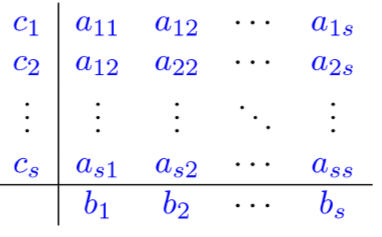

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def RK_implizit(x0, X, N, f, df, tol):
    # x0: Startpunkt
    # X: Endpunkt
    # f: Funktion
    # df: Jacobi Matrix der Funktion f
    # N: Anzahl der Schritte
    # tol: Toleranz
    # Butcher tableau
    c1 = 0.5
    c2 = 0

    a11 =0.5
    a12 = 0
    
    a21 = 0
    a22 = 0

    b1 = 1
    b2 = 0
    
    max_iter=20

    h= (X-x0[0])/N
    N = N+1
    #print( "IMP: Schrittweite: ", h)
    x = np.zeros(N)
    y = np.zeros(N)
    x[0] = x0[0]
    y[0] = x0[1]

    #Anfangspunkt berechnen
    k = f(x[0],y[0])

    for i in range(1,N):
        step = 0
        x[i] = x[i-1] + h
        k1=f(x[i-1] + c1*h, y[i-1] + (h*(k1*a11+a12*k2)))
        k2= f(x[i-1] + c2*h, y[i-1] + (h*(k1*a21+a22*k2)))

        F = np.array([[k1 - f(x[i-1] + c1*h, y[i-1] + (h*(k1*a11+a12*k2)))],[k2-f(x[i-1] + c2*h, y[i-1] + (h*(k1*a21+a22*k2)))]])  

        while np.abs(r) > tol and step < max_iter:
            j = df(x[i-1] + h, y[i-1] + (h*k))


            delta_k = -r / (1 - (h*j))
            k = k + delta_k
            r = f(x[i-1] + c1*h, y[i-1] + (h*(k1*a11+a12*k2)))
            step += 1

        y[i] = y[i-1] + (h*k)

    return x,y


In [ ]:
#def model2(x,y):
#    return -4*y
#
#def model2_df(x,y):
#    return -4

## Aufgabe 5: AWP y' + x**2 / y = 0, y(0) = -4

IMP: Schrittweite:  0.1111111111111111


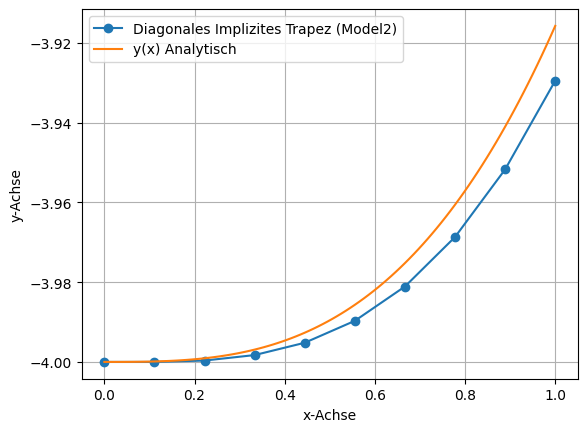

In [9]:
def implizitEuler_DIRK(x0, X, f, df, N, A, B, C, tol):
    # x0: Startpunkt
    # X: Endpunkt
    # f: Funktion
    # df: Jacobi Matrix der Funktion f
    # N: Anzahl der Schritte
    # tol: Toleranz
    max_iter=20

    h = (X-x0[0])/(N-1)
    print( "IMP: Schrittweite: ", h)
    x = np.zeros(N)
    y = np.zeros(N)
    x[0] = x0[0]
    y[0] = x0[1]
    s = 0

    for i in range(1,N):
        #print("K: ", k)
        step = 0
        
        x[i] = x[i-1] + h
        k_1 = f(x[i-1], y[i-1])
        k_2 = k_1
        r = k_2 - f(x[i-1]+h, y[i-1] + h*(k_1*A[s][0] + k_2*A[s][1]))

        while np.abs(r) > tol and step < max_iter:
            j = -df(x[i-1] + h*C[0], y[i-1] + h*(k_1*A[s][0] + k_2*A[s][1]))
            delta_k = -r / (1-h*j)
            k_2 += delta_k
            r = k_2 - f(x[i-1] + h*C[0], y[i-1] + h*(k_1*A[s][0] + k_2*A[s][1]))
            step += 1
        
        #print("k's: ", kl[0], kl[1])
        y[i] = y[i-1] + h*(k_1*B[0] + k_2*B[1])
    return x, y


def model2(x,y):
    return (-x**2)/(y)
    
def model2_df(x,y):
    return (x**2)/(y**2)
    
def model2_analytisch(x):
    return -np.sqrt(2/3) * np.sqrt(24 - x**3)

x0 = (0, -4)

# c | a
#   | b
c1 = 0.0
c2 = 1.0
a1 = [0.0, 0.0]
a2 = [0.5, 0.5]
b1 = 0.5
b2 = 0.5
A = [a1, a2]
B = [b1, b2]
C = [c1, c2]
x_imp_dirk2, y_imp_dirk2 = implizitEuler_DIRK(x0, 1, model2, model2_df, 10, A, B, C ,1e-3)


x_an = np.linspace(0,1,100)
plt.figure(2)
plt.plot(x_imp_dirk2, y_imp_dirk2, 'o-', label='Diagonales Implizites Trapez (Model2)')
plt.plot(x_an, model2_analytisch(x_an), '-', label='y(x) Analytisch')
plt.ylabel('y-Achse')
plt.xlabel('x-Achse')
plt.legend()
plt.grid(True)
plt.show()